In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

Text(0.5, 18.5, 'date')

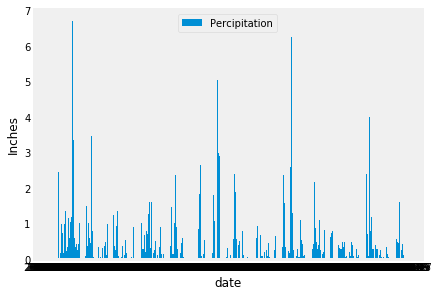

In [80]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel = [Measurement.date, Measurement.prcp]

# Calculate the date 1 year ago from the last data point in the database
date = dt.datetime(2016,8,23)

# Perform a query to retrieve the data and precipitation scores
precipiation = session.query(*sel).filter(Measurement.date >= date)

# Save the query results as a Pandas DataFrame and set the index to the date column
last_yr_df = pd.DataFrame(precipiation)
last_yr_df.drop_duplicates("date")
last_yr_df
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
pre_graph = plt.bar(last_yr_df["date"],last_yr_df["prcp"],label = "Percipitation")

plt.tight_layout()
plt.legend(loc = "upper center")
plt.grid()
plt.ylabel('Inches')
plt.xlabel('date')

In [17]:
last_yr_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [50]:
sel_stations = [Measurement.station,Measurement.date,Measurement.prcp, Measurement.tobs]
hawaii_measurements = session.query(*sel_stations)
hawaii_measurements_df = pd.DataFrame(hawaii_measurements)
hawaii_measurements_df

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0
19546,USC00516128,2017-08-20,NaN,78.0
19547,USC00516128,2017-08-21,0.56,76.0
19548,USC00516128,2017-08-22,0.50,76.0


In [51]:
no_of_stations = hawaii_measurements_df["station"].nunique()
no_of_stations

9

In [52]:
act_station = hawaii_measurements_df.groupby(hawaii_measurements_df["station"]).count()
act_station = act_station.sort_values("date",ascending=False)
act_station["date"]

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: date, dtype: int64

In [69]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_act_station = ("USC00519281")
act_stat = session.query(*sel_stations).filter(Measurement.station == most_act_station)
act_stat_df = pd.DataFrame(act_stat)
act_stat_df
print(act_stat_df["tobs"].min(),act_stat_df["tobs"].max(),act_stat_df["tobs"].mean())

54.0 85.0 71.66378066378067


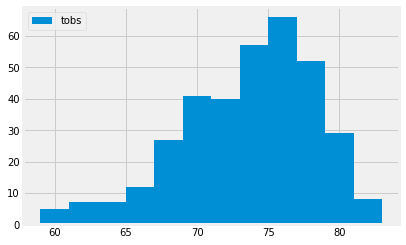

In [76]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
act_stat_yr = session.query(*sel_stations).filter(Measurement.station == most_act_station).filter(Measurement.date >= date)
act_stat_yr_df = pd.DataFrame(act_stat_yr)
act_stat_yr_df

xaxis = act_stat_yr_df["tobs"]
plt.hist(xaxis,bins=12,label = "tobs")
plt.legend(loc = "upper left")

In [77]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]
